In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import glob
import matplotlib.pyplot as plt


##  Evaluate different model fusion

In [2]:
dff=rm.comb_eval(models=['Fu'])

<AxesSubplot:xlabel='eval_dataset', ylabel='R_eval'>

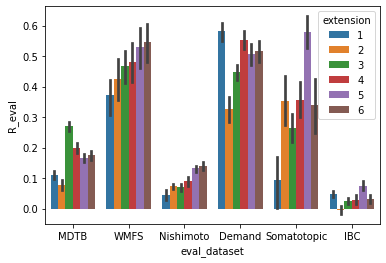

In [6]:
dff
sns.barplot(data=dff,x='eval_dataset',hue='extension',y='R_eval')